# Исследование объявлений о продаже квартир

В моём распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Моя задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Всего в таблице 22 столбца.<br>
Подробно разберём, какие в data столбцы и какую информацию они содержат:
<ul>
    <li>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</li>
    <li>balcony — число балконов</li>
    <li>ceiling_height — высота потолков (м)</li>
    <li>cityCenters_nearest — расстояние до центра города (м)</li>
    <li>days_exposition — сколько дней было размещено объявление (от публикации до снятия)</li>
    <li>first_day_exposition — дата публикации</li>
    <li>floor — этаж</li>
    <li>floors_total — всего этажей в доме</li>
    <li>is_apartment — апартаменты (булев тип)</li>
    <li>kitchen_area — площадь кухни в квадратных метрах (м²)</li>
    <li>last_price — цена на момент снятия с публикации</li>
    <li>living_area — жилая площадь в квадратных метрах(м²)</li>
    <li>locality_name — название населённого пункта</li>
    <li>open_plan — свободная планировка (булев тип)</li>
    <li>parks_around3000 — число парков в радиусе 3 км</li>
    <li>parks_nearest — расстояние до ближайшего парка (м)</li>
    <li>ponds_around3000 — число водоёмов в радиусе 3 км</li>
    <li>ponds_nearest — расстояние до ближайшего водоёма (м)</li>
    <li>rooms — число комнат</li>
    <li>studio — квартира-студия (булев тип)</li>
    <li>total_area — площадь квартиры в квадратных метрах (м²)</li>
    <li>total_images — число фотографий квартиры в объявлении</li>

### Вывод

Есть несколько проблем, которые нужно решать: пропуски и неправильные типы данных.

### Шаг 2. Предобработка данных

#### Заполнение пропусков

Воспользуемся функцией для поиска пропущенных значений

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы можем наблюдать пропущенные значения в следующих столбцах:
<ul>
 <li>ceiling_height</li>
 <li>living_area</li>
 <li>is_apartment</li>
 <li>kitchen_area</li>  
 <li>balcony</li>
 <li>locality_name</li>
 <li>balcony</li>
 <li>airports_nearest</li>
 <li>cityCenters_nearest</li>
 <li>parks_around3000</li>
 <li>parks_nearest</li>
 <li>ponds_around3000</li>
 <li>ponds_nearest</li>
 <li>days_exposition</li>
 <li>locality_name</li>
 </ul

Для каждого столбца, в котром есть пропущенные значения необходимо применять разные методы заполнения пропусков.

<h5>1. ceiling_height - высота потолков (м)</h5>
Применим метод describe()


In [4]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

мы видим. что максимальная высота потолка - 100 метров, а минимальная 1 м. Это явно выпадающие значения и ошибка. Для более точного подсчёта значения, которым мы будем заполнять пропуски, необходимо воспользоваться медианой

In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(value = data['ceiling_height'].median())

<h5>2. living_area - жилая площадь в квадратных метрах(м²)</h5>
Количесвто пропущенных значений в этом столбце составляет приблизительно 8%. Применим метод describe()

In [6]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Мы видим, что минимальная площадь составляет всего 2 метра, что маловероятно. Максимальная площадь составляет 409 метров, что вполне реально. Исходяиз того, что количесвто пропущенных значений в данном столбце невелико и выпадающих значений мало, есть смысл применять среднее статистическое для заполнения пропущенных значений.

Площадь жилой зоны можно посчитать несколькими способами:
1. Найти среднюю величину одной комнаты и от нее заполнять в зависимости от комнат
2. Посмотреть среднюю площадь одной комнаты на внешних ресурсах и умножить на количество комнат


In [7]:
#скопируем дата фрейм
data_copy = data.copy()

In [8]:
#Уберем все NaNы
data_copy.dropna()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
29,9,8600000.0,100.0,2016-04-09T00:00:00,3,2.65,19.0,52.0,15,False,...,11.0,0.0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
50,1,4500000.0,48.2,2017-11-13T00:00:00,1,2.70,5.0,25.4,4,False,...,9.0,1.0,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0
56,14,4350000.0,41.0,2016-03-28T00:00:00,1,2.80,7.0,18.1,4,False,...,11.1,2.0,Санкт-Петербург,13772.0,9626.0,1.0,271.0,1.0,439.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23416,14,8300000.0,64.5,2015-12-02T00:00:00,2,2.77,11.0,36.2,4,False,...,18.2,1.0,Санкт-Петербург,34496.0,15595.0,1.0,513.0,3.0,222.0,433.0
23489,9,7100000.0,56.0,2017-04-21T00:00:00,2,2.65,6.0,30.8,5,False,...,9.0,0.0,Санкт-Петербург,31486.0,4578.0,1.0,780.0,3.0,329.0,136.0
23563,18,5500000.0,51.0,2017-03-24T00:00:00,2,2.55,10.0,30.3,2,False,...,9.0,1.0,Санкт-Петербург,30305.0,11331.0,1.0,448.0,1.0,919.0,377.0
23665,11,4250000.0,47.0,2016-05-20T00:00:00,1,2.65,6.0,18.2,1,False,...,14.6,0.0,Санкт-Петербург,20503.0,4946.0,2.0,624.0,1.0,519.0,131.0


In [9]:
#поделим жилую площадь на количество комнат. Так мы узнаем средную площадь одной комнаты.
one_room_area = data_copy['living_area'] / data_copy['rooms']
one_room_area = one_room_area.median()
print(one_room_area)

16.0


Мы получили медианное значение одной комнаты 16 кв.метров. Соответственно, теперь в рабочем датафрейме можно заполнить жилое пространство основываясь на этом значении и количестве комнат.

In [10]:
living_area_median = data['rooms'] * one_room_area

In [11]:
data['living_area'] = data['living_area'].fillna(value = living_area_median)

<h5>3. is_apartment - апартаменты</h5>
Так как апартаменты это недвижимость, которая не пользуется большим спросом. я считаю, что все пропущенные значения означают, что эта недвижимость не аппартаменты. Соответственно, все пропущенные значения можно заполнить значением False.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(value = False)

<h5>4. kitchen_area - площадь кухни в квадратных метрах (м²)</h5>
Аналогично с жилойплощадью заполняем средним значением.

In [13]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [14]:
#Рассчитаем коэффициент для площади кухни
kitchen_coef = data_copy['kitchen_area'] / data_copy['total_area']
kitchen_coef = kitchen_coef.median()
print(kitchen_coef)

0.1724137931034483


In [15]:
#Заполним пропущенные значения площади кухни при помощи коэффициента
kitchen_area_median = data['total_area'] * kitchen_coef
data['kitchen_area'] = data['kitchen_area'].fillna(value = kitchen_area_median)

<h5>5. balcony - число балконов</h5>
Количество балконов целесообразно заполнять медианой (1). Так как в большинстве квартир есть один балкон и квартиры без балконане пользуются особой популярностью.

In [16]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [17]:
data['balcony'] = data['balcony'].fillna(value = data['balcony'].median())

<h5>6. Оставшиеся стобцы</h5>
<ul>
    <li>airports_nearest</li>
    <li>cityCenters_nearest</li>
    <li>parks_around3000</li>
    <li>parks_nearest</li>
    <li>ponds_around3000</li>
    <li>ponds_nearest</li>
    <li>days_exposition</li>
    <li>floors_total</li>
</ul>
Количество объектов - медианой, расстояние - средним значением.  

In [18]:
data['airports_nearest'] = data['airports_nearest'].fillna(value = data['airports_nearest'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value = data['cityCenters_nearest'].median())
data['parks_around3000'] = data['parks_around3000'].fillna(value = data['parks_around3000'].median())
data['parks_nearest'] = data['parks_nearest'].fillna(value = data['parks_nearest'].median())
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = data['ponds_around3000'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(value = data['ponds_nearest'].median())
data['days_exposition'] = data['days_exposition'].fillna(value = data['days_exposition'].median())
data['floors_total'] = data['floors_total'].fillna(value = data['floors_total'].median())

In [19]:
#Проверим наличие значений этажа превышающих общее количество
floor_check = data.query('floors_total < floor')
floor_check['floors_total'].count()

37

Мы имеем 34 значения, в которых номер этажа превышает общее количество. Приравняем значение этажа к общему количеству этажей 

In [20]:
data.loc[data['floor'] > data['floors_total'], 'floor'] = data['floors_total']

In [21]:
# Проверяем
floor_check = data.query('floors_total < floor')
floor_check['floors_total'].count()

0

<h5>7. locality_name - название населённого пункта</h5>
Всего таких значений 49. на мой взгляд, можно использовать слово "Неизвестно". 

In [22]:
data['locality_name'] = data['locality_name'].fillna(value = 'Неизвестно')

In [23]:
#Проверяем, все ли значения заполнены
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

#### Смена типов данных

В таблице есть столбцы, в которых необходимо поменять тип данных это:
<ul>
 <li>last_price</li>
 <li>floors_total</li>
 <li>is_apartment</li>
 <li>balcony</li>
 <li>airports_nearest</li>
 <li>cityCenters_nearest</li>
 <li>parks_around3000</li>
 <li>parks_nearest</li>
 <li>ponds_around3000</li>
 <li>ponds_nearest</li>
 <li>days_exposition</li>
</ul>


Тип данных всех столбцов, кроме is_apartment, необходимо поменят на целочисленный тип данных. В этих столбцах находятся только целые числа без дробной части (мы не используем метры и копейки при подсчёте расстояния и цены, а также количесвто остальных значений измеряется в штуках). Тип данных столбца is_apartment необходимо поменять на булевый тип.

In [24]:
#Создадим переменную со списком столбцов, в которых необходимо поменять тип данных
columns = ['last_price', 
           'floors_total', 
           'balcony',
           'airports_nearest',
           'cityCenters_nearest',
           'parks_around3000',
           'parks_nearest',
           'ponds_around3000',
           'ponds_nearest',
           'days_exposition'
          ]
data[columns] = data[columns].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

In [25]:
#Проверяем всё ли правильно
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null float64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        236

#### Вывод
Мы заполнили все пропущенные значения и исправили тип данныхЮ где это было необходимо.

### Шаг 3. Посчитайте и добавьте в таблицу

#### Цена квадратного метра

In [26]:
# Посчитаем цену квадратного метра и приведён к целочисленному типу данных. Добавим новый столбец в общую таблицу
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].astype('int')

#### Добавление дня недели, месяца, года

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8.0,False,...,16028,1,482,2,755,95,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1.0,False,...,18603,0,455,0,502,81,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4.0,False,...,13933,1,90,2,574,558,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,48.0,9.0,False,...,6800,2,84,3,234,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13.0,False,...,8098,2,112,1,48,121,100000,1,6,2018


#### Добавление этажа квартиры; варианты — первый, последний, другой

In [29]:
#Проверяем, есть ли значение этажа больше общего количества этажей. Такое может быть из-за заполнения медианой
#print(data.query('floor > floors_total').count())

In [30]:
#применим цикл для сортировки значений
data.loc[:, 'floor_cat'] = 'другой' 
data.loc[data['floor'] == 1, 'floor_cat'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_cat'] = 'последний'

In [31]:
#проверяем
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_cat
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8.0,False,...,1,482,2,755,95,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1.0,False,...,0,455,0,502,81,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4.0,False,...,1,90,2,574,558,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,48.00,9.0,False,...,2,84,3,234,424,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13.0,False,...,2,112,1,48,121,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5.0,False,...,0,455,1,502,55,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6.0,False,...,0,455,0,502,155,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24,32.00,22.0,False,...,0,455,0,502,95,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26.0,False,...,0,455,1,502,189,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7.0,False,...,0,455,0,502,289,88524,6,2,2017,другой


#### Добавление соотношения жилой и общей площади, а также площади кухни к общей

In [32]:
#  Добавим столбец с соотношением жилой и общей площади
data['living_to_total'] = data['living_area'] / data['total_area']
#  Добавим функцию для форматирования в процентах
def format_cell(cell): 
    return format(cell, '.2%')
data['living_to_total'] = data['living_to_total'].apply(format_cell)

In [33]:
#  Добавим столбец с соотношением жилой и общей площади
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_to_total'].apply(format_cell)

In [34]:
#проверяем, всё ли на месте
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_cat,living_to_total,kitchen_to_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8.0,False,...,2,755,95,120370,3,3,2019,другой,47.22%,23.15%
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1.0,False,...,0,502,81,82920,1,12,2018,первый,46.04%,27.23%
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4.0,False,...,2,574,558,92785,3,8,2015,другой,61.25%,14.82%
3,0,64900000,159.00,2015-07-24,3,2.65,14,48.00,9.0,False,...,3,234,424,408176,4,7,2015,другой,30.19%,17.24%
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13.0,False,...,1,48,121,100000,1,6,2018,другой,32.00%,41.00%
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5.0,False,...,1,502,55,95065,0,9,2018,другой,47.37%,29.93%
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6.0,False,...,0,502,155,99195,3,11,2017,другой,28.42%,38.61%
7,5,7915000,71.60,2019-04-18,2,2.65,24,32.00,22.0,False,...,0,502,95,110544,3,4,2019,другой,44.69%,26.40%
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26.0,False,...,1,502,189,87454,2,5,2018,другой,46.53%,26.57%
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7.0,False,...,0,502,289,88524,6,2,2017,другой,71.48%,10.66%


#### Вывод
Добавлены столбцы содержащие следующую информацию: цена за квадратный метр, день недели, месяц, год, категория этажа, соотношение жилой площади и кухни к общей площади

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [35]:
import matplotlib.pyplot as plt
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

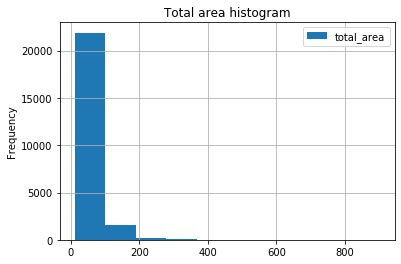

In [36]:
data['total_area'].plot(kind='hist', legend=True, grid=True, title='Total area histogram')

В данном столбце средняя площадь составляет 60 квадратных метров. На мой взгляд, квартиры более 300 квадратных метров можно отбросить. Если посмотреть объявления по продажи квартир, в Санкт-Петербурге и ЛО нет квартир, у которых площадь больше 300 квадратных метров.

In [37]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

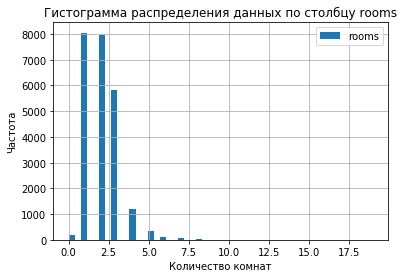

In [38]:
data['rooms'].plot(kind='hist', legend=True, grid=True, title='Rooms histogram', bins=50)
plt.title('Гистограмма распределения данных по столбцу rooms')
plt.ylabel('Частота')
plt.xlabel('Количество комнат')
plt.show()

Среднее количесвто комнат 2. Я считаю, что можно отбросить значения, у которых больше 7 комнат. 

In [40]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

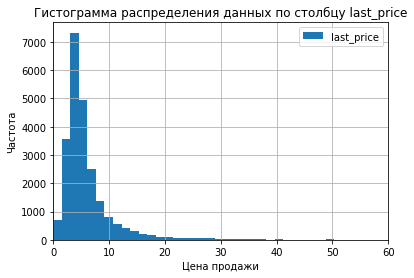

In [41]:
data['last_price'].plot(kind='hist', legend=True, grid=True, xlim=(0,60), title='Last price histogram', bins=500)
plt.title('Гистограмма распределения данных по столбцу last_price')
plt.ylabel('Частота')
plt.xlabel('Цена продажи')
plt.show()

Средняя цена 6 миллионов, вполне соответствует реальности. Тут можно отбросить значения меньше 1 миллиона.

In [43]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

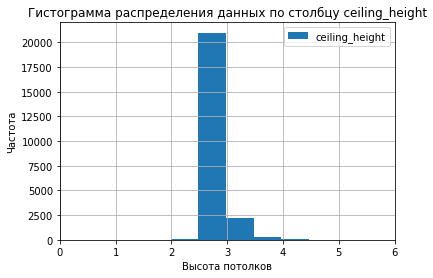

In [44]:
data['ceiling_height'].plot(kind='hist', xlim=(0,6), legend=True, grid=True, title='Ceiling_height histogram', bins=200)
plt.title('Гистограмма распределения данных по столбцу ceiling_height')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd4df8390>]],
      dtype=object)

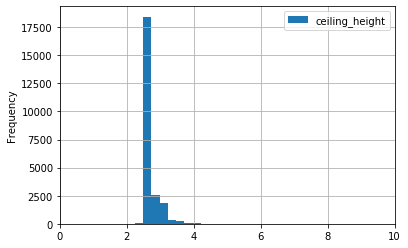

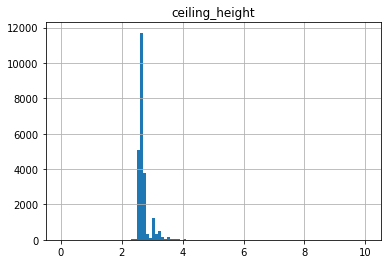

In [46]:
# код ревьювера
data['ceiling_height'].plot(kind='hist', xlim=(0,10), legend=True, grid=True, bins=400)
data.hist(column='ceiling_height', range=(0,10), bins=100)

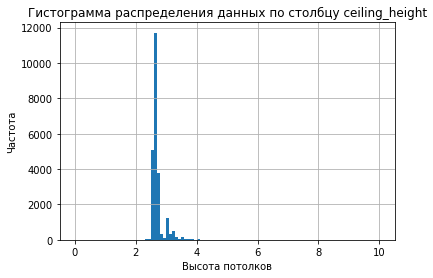

In [47]:
# код ревьювера
data.hist(column='ceiling_height', range=(0,10), bins=100)
plt.title('Гистограмма распределения данных по столбцу ceiling_height')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')
plt.show()


Средняя величина потолка 2,7 мтеров. По нормам минимальная высота потолков: на кухне и в жилых комнатах - не менее 2,5-2,7 метра. Соответственно, можно отбросить значения меньше 2,5 метров. Также можно отбросить значения больше 4 метров. В старом фонде Санкт-Петербурга много домой с высотой потолка 4 метра.

In [48]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

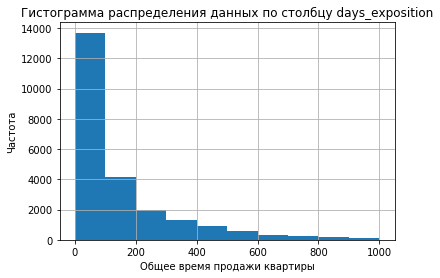

In [49]:
data.hist(column='days_exposition', range=(0,1000), bins=10)
plt.title('Гистограмма распределения данных по столбцу days_exposition')
plt.ylabel('Частота')
plt.xlabel('Общее время продажи квартиры')
plt.show()

Среднее время продажи квартиры составляет: 180 дней. Медиана: 124 дня. В большинстве случаев продажа квартиры занимает не более 200 дней. На мой взгляд, продажи квартиры менее чем за две недели можно считать подозрительно быстрыми. Так как покупателю нужно как минимум всё посмотреть и проверить все документы на квартиру. Необчыно долгими можно считать продажи более чем за год.

#### Автоматизация построения гистограмм

In [51]:
# Напишем функцию для построения гистограмм
def hist_draw(column, range, bins):
    return data.hist(column=column, range=range, bins=bins)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd4e606d0>]],
      dtype=object)

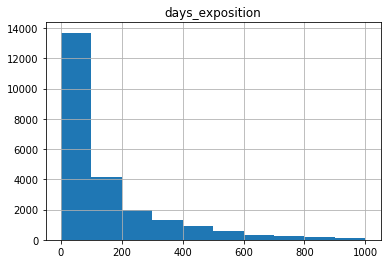

In [52]:
#Проверяем
hist_draw('days_exposition', (0,1000), 10)

Также можно создать функцию автоматического построения гистограмм для многих столбцов

In [53]:
#Создадим переменную со списком столбцов, для которых необходимо построить гистограммы
columns = ['total_area', 
           'rooms', 
           'last_price',
           'ceiling_height',
           'days_exposition'
          ]
#Напишем функцию для автоматического построения гистограмм для всех столбцов
def multiple_hist(columns, bins):
    for row in columns:
        data.hist(column=row, range=(0, data[row].max()), bins=bins)
        
        plt.ylabel('Частота')
        
        plt.show()
    return

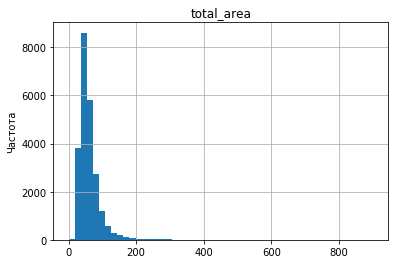

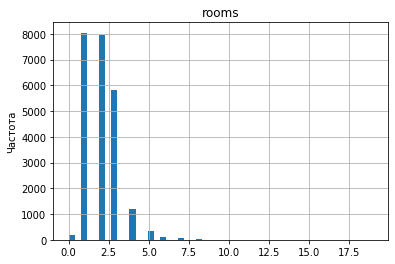

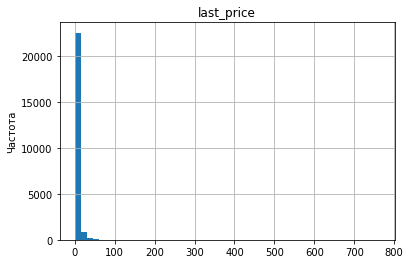

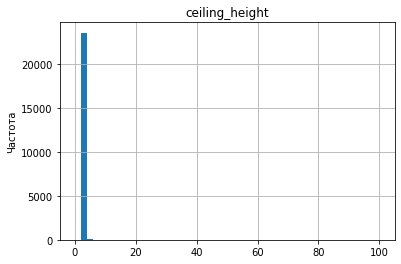

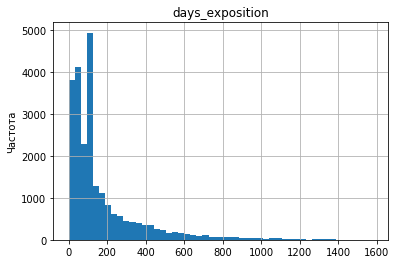

In [54]:
multiple_hist(columns, 50)

#### Отбрасывание выбивающихся значений

In [55]:
#Уберём выбивающиеся значения
data_good = data.query('14 < days_exposition < 365 and total_area < 300 and rooms < 7 and last_price > 1 and 2.5 < ceiling_height < 4')


#### Какие факторы больше всего влияют на стоимость квартиры?

In [56]:
#Выведем таблицу data_good на экран
data_good.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_cat,living_to_total,kitchen_to_total
0,20,13.00,108.0,2019-03-07,3,2.70,16,51.0,8.0,False,...,2,755,95,120370,3,3,2019,другой,47.22%,23.15%
1,7,3.35,40.4,2018-12-04,1,2.65,11,18.6,1.0,False,...,0,502,81,82920,1,12,2018,первый,46.04%,27.23%
4,2,10.00,100.0,2018-06-19,2,3.03,14,32.0,13.0,False,...,1,48,121,100000,1,6,2018,другой,32.00%,41.00%
5,10,2.89,30.4,2018-09-10,1,2.65,12,14.4,5.0,False,...,1,502,55,95065,0,9,2018,другой,47.37%,29.93%
6,6,3.70,37.3,2017-11-02,1,2.65,26,10.6,6.0,False,...,0,502,155,99195,3,11,2017,другой,28.42%,38.61%


In [57]:
#Посмотрим на коэффициент корреляции между стоимость и квадратным метром
data_good['last_price'].corr(data_good['total_area'])

0.6578936668064141

In [58]:
#Посмотрим на коэффициент корреляции между стоимостью и числом комнат
data_good['last_price'].corr(data_good['rooms'])

0.38329404620647406

In [59]:
#Посмотрим на коэффициент корреляции между стоимостю и этажом (первый и последний)
data_good.loc[:, 'floor_cat'] = 3 
data_good.loc[data_good['floor'] == 1, 'floor_cat'] = 1
data_good.loc[data_good['floor'] == data_good['floors_total'], 'floor_cat'] = 2
floor_first = data_good.query('(floor_cat == 1) or (floor_cat == 2)')
floor_first['last_price'].corr(floor_first['floor_cat'])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0.1009628148565645

In [60]:
#Посмотрим на коэффициент корреляции между стоимость и удалённостью от центра
data_good['last_price'].corr(data_good['cityCenters_nearest'])

-0.23368283354161618

In [61]:
#Посмотрим на коэффициент корреляции между стоимость и днём недели
data_good['last_price'].corr(data_good['weekday'])

-0.014386856060516833

In [62]:
#Посмотрим на коэффициент корреляции между стоимость и месяцем
data_good['last_price'].corr(data_good['month'])

-0.01098554048020516

In [63]:
#Посмотрим на коэффициент корреляции между стоимость и годом
data_good['last_price'].corr(data_good['year'])

0.006209658993892153

#### Построим матрицу корреляций и графики зависимостей

In [64]:
#Создадим список необходимых столбцов(для корреляции) и матрицу корреляций
columns_corr = ['last_price', 'total_area', 'rooms', 'floor_cat', 'cityCenters_nearest', 'weekday', 'month', 'year']
data_corr = data[columns_corr]
data_corr.corr()

,last_price,total_area,rooms,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.653675,0.363343,-0.191024,0.001550,0.002779,-0.043089
total_area,0.653675,1.000000,0.758344,-0.210650,-0.004695,0.004920,-0.079912
rooms,0.363343,0.758344,1.000000,-0.161199,-0.004134,-0.004469,-0.055418
cityCenters_nearest,-0.191024,-0.210650,-0.161199,1.000000,0.007416,-0.007613,0.025648
weekday,0.001550,-0.004695,-0.004134,0.007416,1.000000,0.011496,-0.004799
month,0.002779,0.004920,-0.004469,-0.007613,0.011496,1.000000,-0.269642
year,-0.043089,-0.079912,-0.055418,0.025648,-0.004799,-0.269642,1.000000


In [65]:
#Построим сводную таблицу и график
pivot_weekday = data_good.pivot_table(index='weekday', values='last_price' ,aggfunc='median')

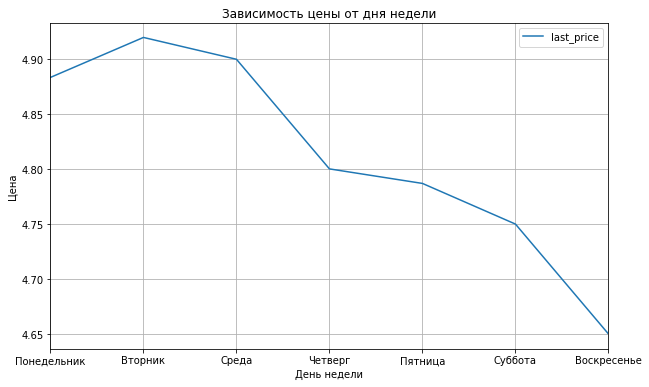

In [66]:
pivot_weekday.plot(grid=True, figsize=(10, 6))
plt.title('Зависимость цены от дня недели')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.show()


In [67]:
#Автоматизируем построение сводных и графиков
pivot_corr_list = ['total_area', 'rooms', 'floor_cat', 'cityCenters_nearest', 'weekday', 'month', 'year']
def pivot_corr(columns):
    for row in columns:
        data_good.pivot_table(index=row, values='last_price' ,aggfunc='median').plot(grid=True, legend=True,figsize=(10, 6))
        plt.ylabel('Цена')
        plt.show()
    return

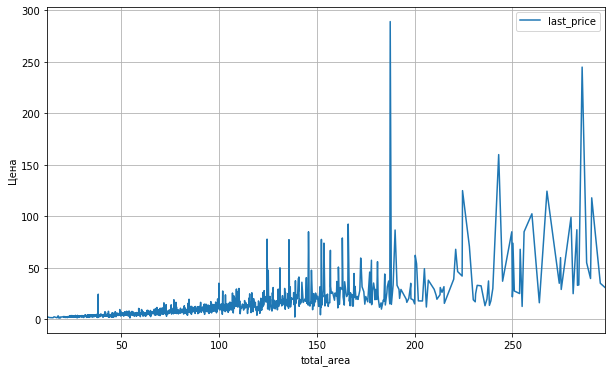

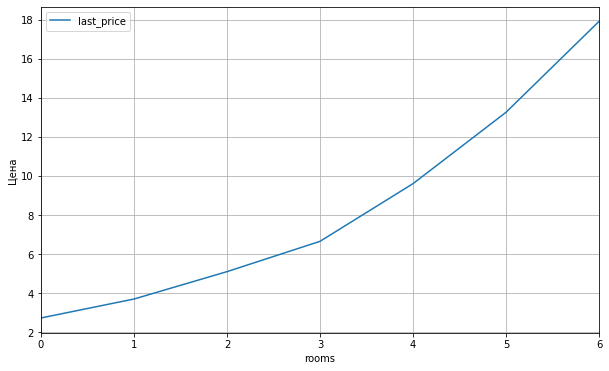

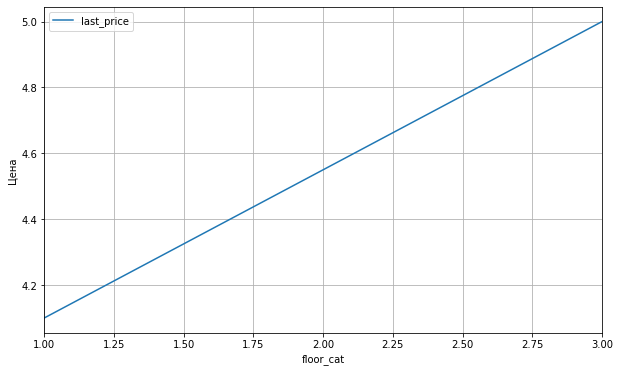

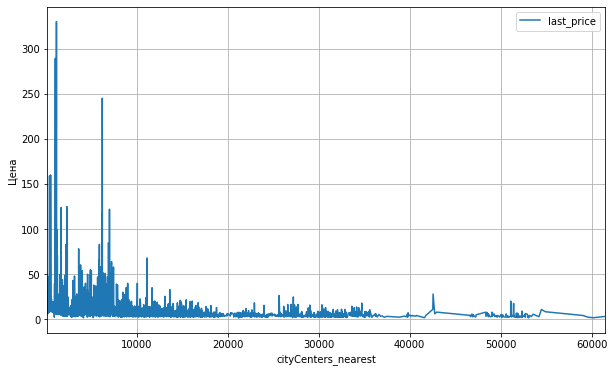

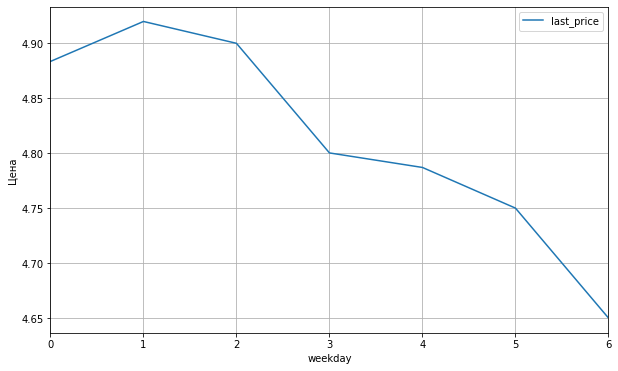

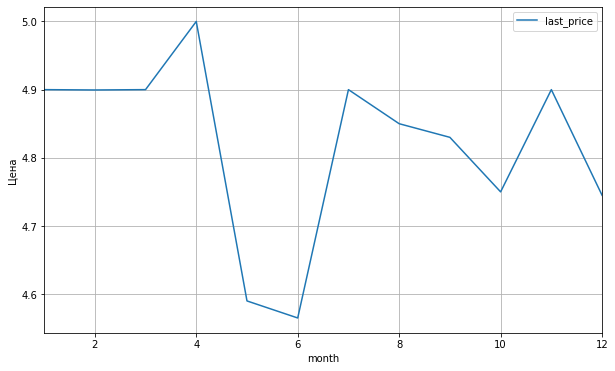

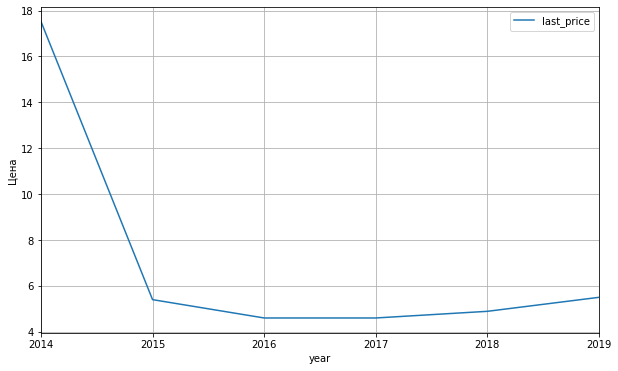

In [68]:
#Проверим работу функции
pivot_corr(pivot_corr_list)

Стоимость квартиры довольно сильно зависит от квадратного метра и количества комнат (что логично). Также есть зависимость между стоимостью и удалением от центра. Чем дальше, тем дешевле (отрицательный коэффициент корреляции). 

Вывод 2. 
<ol>
    <li> Общая площадь. Мы видим, что при площади до 100 квадратов стоимость квратиры не сильно колеблеться. Но начиная со 100 квадратов, цены на квартиры начинают очень сильно скакать. Я думаю, для таких квартир очень высок риск мошенничества. </li>
    <li> Категория этажа. Мы видим, что меньше всего стоит 1 этаж, дороже последний таж. И самую высокую стоимость имеют остальные этажи.</li>
    <li> Удаленнность от центра. Тут тоже очень высокие скачки графика при расстоянии до 10 км. Возможно, в исторической части города, действительно цена может так скакать (все зависит от площади). Но также, возможны какие-то мошеннические действия.</li>
    <li> День недели. В субботу квартиры стоят меньше всего, в понедельник больше. Я не могу понять с чем это связано, возможно просто совпадение</li>
    <li> Месяц. Самые дорогие квартиры в апреле, самые дешёвые в июне. Возможно спрос на кваритры летом ниже (все в отпусках) и продать квартиру подороже не получается.</li>
    <li>Год. В 2014 году квартиры стоили дороже всего, возможно, потому что после 2014 в стране произошёл кризис и соответственно, люди стали покупать квартиры подешевле. А возможно, просто мало данных за этот год </li>
    
</ol>    
        

#### Выбираем 10 населённых пунктов

In [69]:
#Выберем 10 населённых пунктов по наибольшему количеству объявлений и посчитаем сруднюю стоимость квадратного метра
pivot = data_good.pivot_table(index='locality_name', values= ['first_day_exposition','price_per_meter'] ,aggfunc={'first_day_exposition': 'count', 'price_per_meter':'mean'})
pivot_sort = pivot.sort_values(by='first_day_exposition', ascending=False)
#Выделим 10 населённых пунктов с наибольшим количеством объявлений
pivot_sort.head(10)

,first_day_exposition,price_per_meter
locality_name,,
Санкт-Петербург,10490,116203.312774
посёлок Мурино,406,86059.551724
посёлок Шушары,336,79108.032738
Всеволожск,300,70007.653333
посёлок Парголово,244,89553.209016
Пушкин,230,103786.752174
деревня Кудрово,229,93246.475983
Колпино,193,74683.704663
Гатчина,176,69178.755682


Самая низкая цена за квадрат - в Выборге: 58264, самая высокая - в Санкт-Петербурге: 114726  

#### Изучите предложения квартир

In [70]:
# Выделим Санкт-Петербург и посчитаем удалённость от центра в километрах
data_saintp = data_good.query('locality_name == "Санкт-Петербург"')
data_saintp.loc[:, 'center_km'] = (data_saintp['cityCenters_nearest'] / 1000).round()
data_saintp.head(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_cat,living_to_total,kitchen_to_total,center_km
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.0,8.0,False,...,755,95,120370,3,3,2019,3,47.22%,23.15%,16.0
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13.0,False,...,48,121,100000,1,6,2018,3,32.00%,41.00%,8.0
7,5,7.915,71.6,2019-04-18,2,2.65,24,32.0,22.0,False,...,502,95,110544,3,4,2019,3,44.69%,26.40%,12.0
10,5,5.050,39.6,2017-11-16,1,2.67,12,20.3,3.0,False,...,553,137,127525,3,11,2017,3,51.26%,21.46%,14.0
15,16,4.650,39.0,2017-11-18,1,2.65,14,20.5,5.0,False,...,296,19,119230,5,11,2017,3,52.56%,19.49%,14.0
19,16,14.200,121.0,2019-01-09,3,2.75,16,76.0,8.0,False,...,502,97,117355,2,1,2019,3,62.81%,9.92%,13.0
21,13,3.200,31.6,2018-03-14,1,2.65,5,16.9,2.0,False,...,502,310,101265,2,3,2018,3,53.48%,18.04%,10.0
24,8,6.500,97.2,2015-10-31,2,2.65,3,46.5,1.0,False,...,124,265,66872,5,10,2015,1,47.84%,20.16%,2.0
25,3,6.800,76.0,2015-10-01,2,2.75,23,39.0,18.0,False,...,564,300,89473,3,10,2015,3,51.32%,19.74%,15.0
26,6,4.050,60.0,2017-04-28,4,2.65,5,43.0,4.0,False,...,95,265,67500,4,4,2017,3,71.67%,11.67%,11.0


In [71]:
pivot = data_saintp.pivot_table(index='center_km', values= 'price_per_meter',aggfunc='mean')
pivot_sort = pivot.sort_values(by='price_per_meter', ascending=False)
pivot_sort.head(15)

,price_per_meter
center_km,
0.0,245777.285714
1.0,193070.939130
7.0,153868.457237
2.0,153197.135747
6.0,150866.795775
5.0,139560.060606
27.0,132115.000000
4.0,129071.397059
8.0,124942.891827


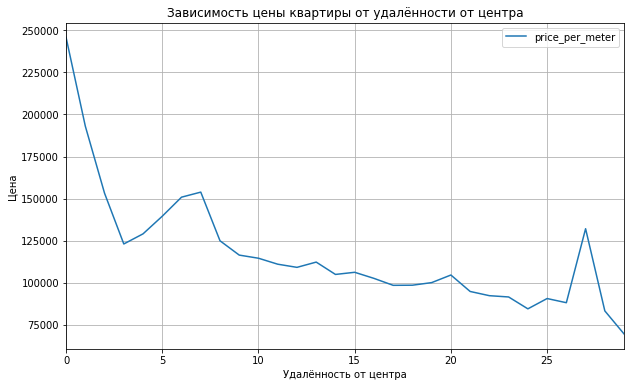

In [72]:
(data_saintp
    .pivot_table(index='center_km', values= 'price_per_meter',aggfunc='mean')
    .plot(grid=True, figsize=(10, 6))
)
plt.title('Зависимость цены квартиры от удалённости от центра')
plt.ylabel('Цена')
plt.xlabel('Удалённость от центра')
plt.show()

Построив график, можно выделить зону 0-8 км. Это и будет центром города. Пик на 27 километрах, полагаю, означает начало города Пушкин (там цены сравнимы с Питерскими).

#### Выделите сегмент квартир в центре

In [73]:
#Выделим радиус в 8 км
data_city_centre = data_saintp.query('center_km < 8')


#### Построим гистограммы для необходимых значений

In [74]:
#Создадим переменную со списком столбцов, для которых необходимо построить гистограммы
columns = ['total_area', 
           'rooms', 
           'last_price',
           'ceiling_height',
           ]
#Напишем функцию для автоматического построения гистограмм для всех столбцов
def multiple_hist_sp(columns, bins):
    for row in columns:
        data_city_centre.hist(column=row, range=(0, data[row].max()), bins=bins, figsize=(10,6))
        plt.ylabel('Частота')
    return

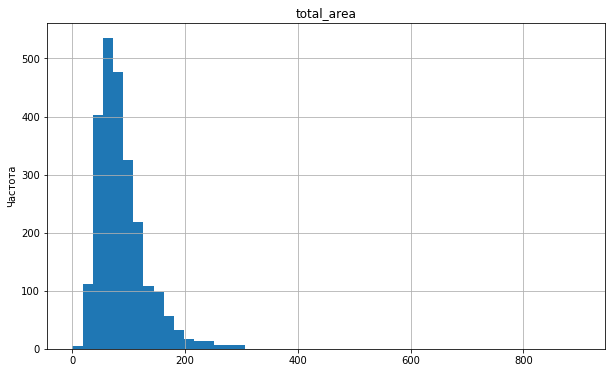

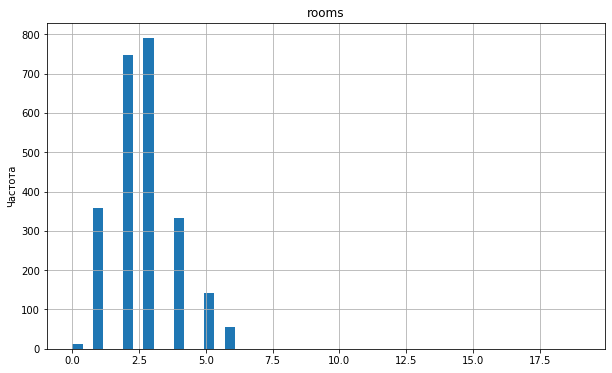

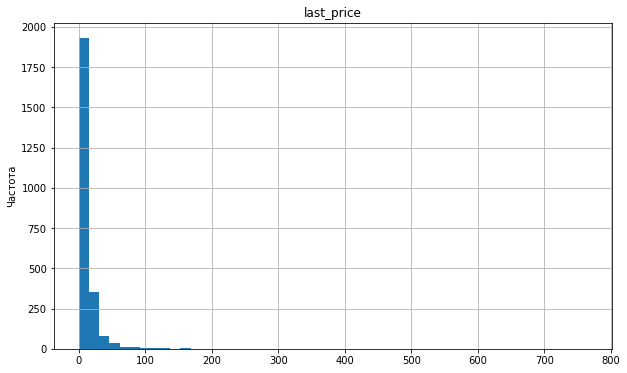

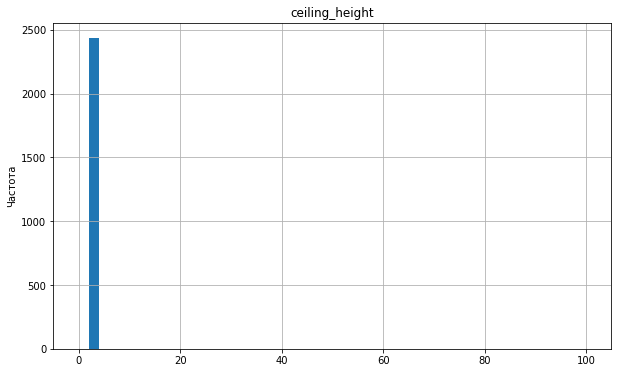

In [75]:
multiple_hist_sp(columns, 50)

In [76]:
data_city_centre['total_area'].describe()

count    2435.000000
mean       86.775487
std        43.765248
min        12.000000
25%        56.850000
50%        77.000000
75%       105.200000
max       297.500000
Name: total_area, dtype: float64

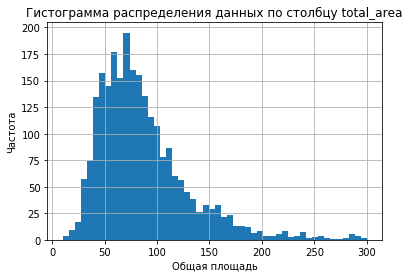

In [77]:
data_city_centre.hist(column='total_area', range=(10,300), bins=50)
plt.title('Гистограмма распределения данных по столбцу total_area')
plt.ylabel('Частота')
plt.xlabel('Общая площадь')
plt.show()

Средняя площадь квартиры в центре Санкт-Петербурга больше: 91 квадрат против 60

In [78]:
data_city_centre['rooms'].describe()

count    2435.000000
mean        2.705955
std         1.193564
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

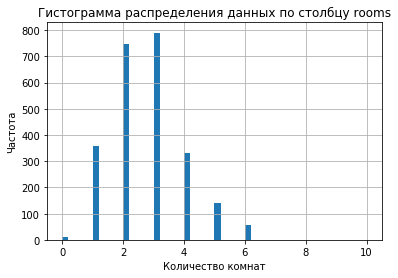

In [79]:
data_city_centre.hist(column='rooms', range=(0,10), bins=50)
plt.title('Гистограмма распределения данных по столбцу rooms')
plt.ylabel('Частота')
plt.xlabel('Количество комнат')
plt.show()

В центре Петербурга и количество комнат выше: 3 против 2. 

In [80]:
data_city_centre['last_price'].describe()

count    2435.000000
mean       13.255068
std        16.388682
min         1.686000
25%         6.649500
50%         9.000000
75%        13.800000
max       330.000000
Name: last_price, dtype: float64

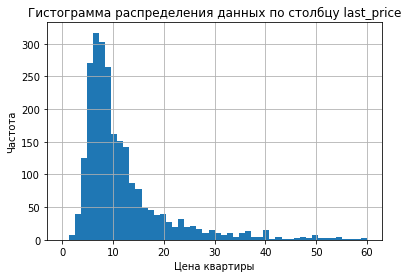

In [81]:
data_city_centre.hist(column='last_price', range=(0,60), bins=50)
plt.title('Гистограмма распределения данных по столбцу last_price')
plt.ylabel('Частота')
plt.xlabel('Цена квартиры')
plt.show()

Цена на квартиры в среднем выше в 2 раза, чем в остальных населённых пунктах.

In [82]:
data_city_centre['ceiling_height'].describe()

count    2435.000000
mean        2.918074
std         0.309756
min         2.510000
25%         2.650000
50%         2.800000
75%         3.100000
max         3.980000
Name: ceiling_height, dtype: float64

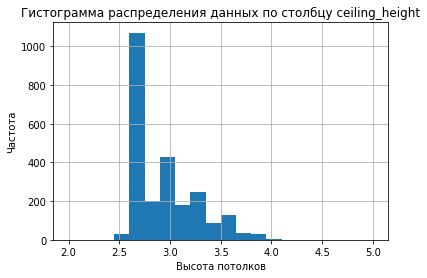

In [83]:
data_city_centre.hist(column='ceiling_height', range=(2,5), bins=20)
plt.title('Гистограмма распределения данных по столбцу ceiling_height')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')
plt.show()

Высота потолков практически одинаковая

#### Построим матрицу корреляций и графики зависимостей стоимости от разных параметров

In [84]:
#Создадим список необходимых столбцов(для корреляции) и матрицу корреляций
columns_corr = ['last_price', 'total_area', 'rooms', 'floor_cat', 'cityCenters_nearest', 'weekday', 'month', 'year']
data_corr = data_city_centre[columns_corr]
data_corr.corr()

,last_price,total_area,rooms,floor_cat,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.588775,0.289654,0.077072,-0.056887,-0.012206,-0.034251,-0.008397
total_area,0.588775,1.000000,0.751214,0.117520,-0.113393,-0.008663,-0.031704,-0.054428
rooms,0.289654,0.751214,1.000000,0.053404,-0.173159,-0.005274,-0.023631,-0.026423
floor_cat,0.077072,0.117520,0.053404,1.000000,0.127632,-0.003262,-0.000207,-0.016486
cityCenters_nearest,-0.056887,-0.113393,-0.173159,0.127632,1.000000,0.013596,0.007007,-0.013033
weekday,-0.012206,-0.008663,-0.005274,-0.003262,0.013596,1.000000,0.039594,-0.013151
month,-0.034251,-0.031704,-0.023631,-0.000207,0.007007,0.039594,1.000000,-0.284893
year,-0.008397,-0.054428,-0.026423,-0.016486,-0.013033,-0.013151,-0.284893,1.000000


In [85]:
#Автоматизируем построение сводных и графиков
pivot_corr_list = ['total_area', 'rooms', 'floor_cat', 'cityCenters_nearest', 'weekday', 'month', 'year']
def pivot_corr_sp(columns):
    for row in columns:
        ex = data_city_centre.pivot_table(index=row, values='last_price' ,aggfunc='median')
        ex.plot(grid=True, legend=True, figsize=(10,6))
        plt.show()
    return

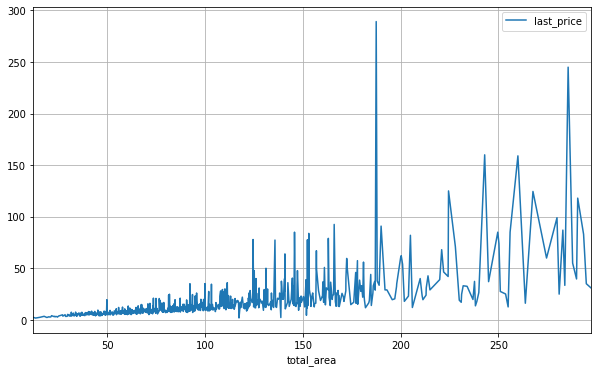

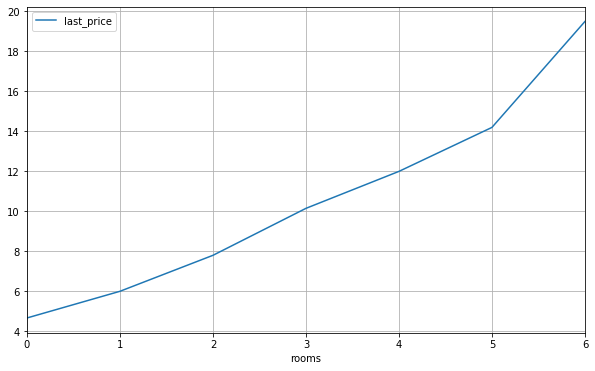

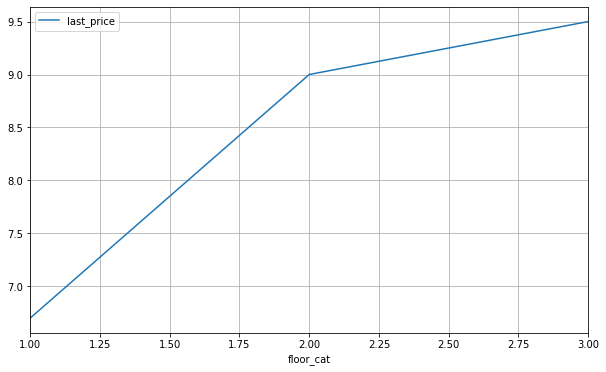

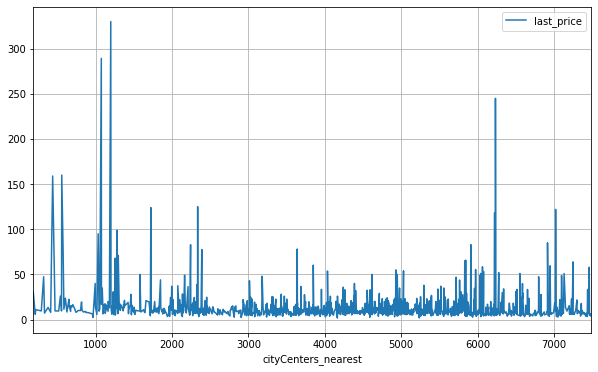

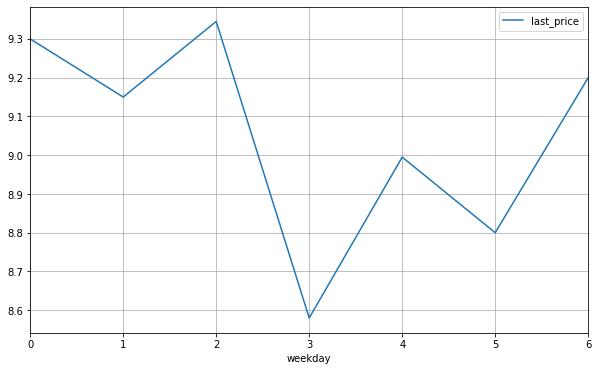

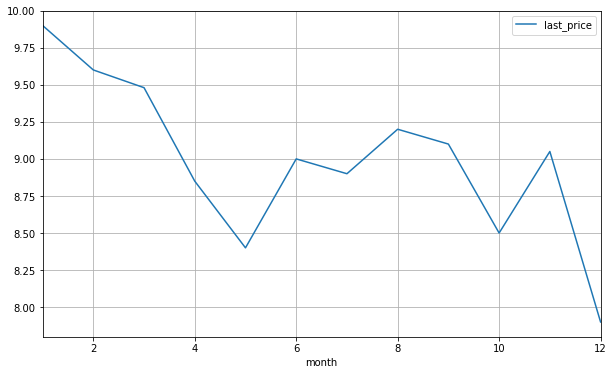

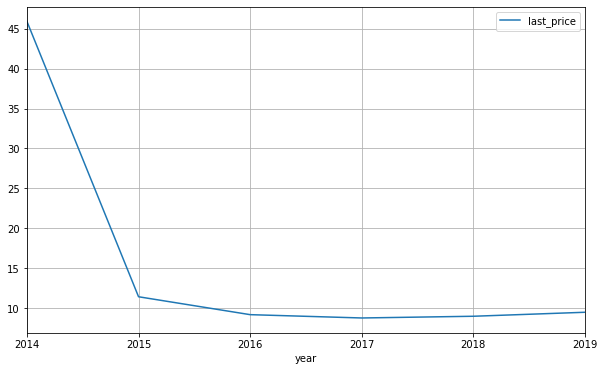

In [86]:
pivot_corr_sp(pivot_corr_list)

Вывод 2. 
<ol>
    <li> Общая площадь. Мы видим, что при площади до 100 квадратов стоимость квратиры не сильно колеблеться. Но начиная со 100 квадратов, цены на квартиры начинают очень сильно скакать. Я думаю, для таких квартир очень высок риск мошенничества. </li>
    <li> Категория этажа. Видно, что последний этаж в центре стоит дороже, чем в общем по области. Это может быть связано с тем, что в центре Питера дома имеют мансарды.</li>
    <li> Удаленнность от центра. Тут тоже очень высокие скачки графика при расстоянии до 7 км. Возможно, в исторической части города, действительно цена может так скакать (все зависит от площади). Но также, возможны какие-то мошеннические действия.</li>
    <li> День недели. В Четверг квартиры стоят меньше всего, в Среду больше. Я не могу понять с чем это связано, возможно просто совпадение</li>
    <li> Месяц. Самые дорогие квартиры в январе, самые дешёвые в мае. Стоимость по месяцам отличается от цен по области.</li>
    <li>Год. В 2014 году квартиры стоили дороже всего, возможно, потому что после 2014 в стране произошёл кризис и соответственно, люди стали покупать квартиры подешевле. А возможно, просто мало данных за этот год </li>
    
</ol>    
        

### Шаг 5. Общий вывод

Я проанализировал объявления о продаже квартир. Избавился от отсутствующих значений. Выделил выпадющие и подозрительные значения. Нашёл средние параметры для значений этажности, площади, высоты потолков, цены. Так же я выделил зависимость цены от различных параметров (квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения). Выделил центр города Санкт-Петербруг и проанализировал стоимость квартир в этом районе. Сравнил параметры влиящие на ценуу в центре Санкт-Петербурга с ценами остальных городов.